In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import cv2

In [3]:
data = np.load('D:/Study/ULMUniversity/Thesis/code/hgru_share/weights/gabors_for_contours_7.npy', allow_pickle=True, encoding='latin1')
data = data.item()
data = data['s1']
data = data[0]

dict_keys(['s1'])


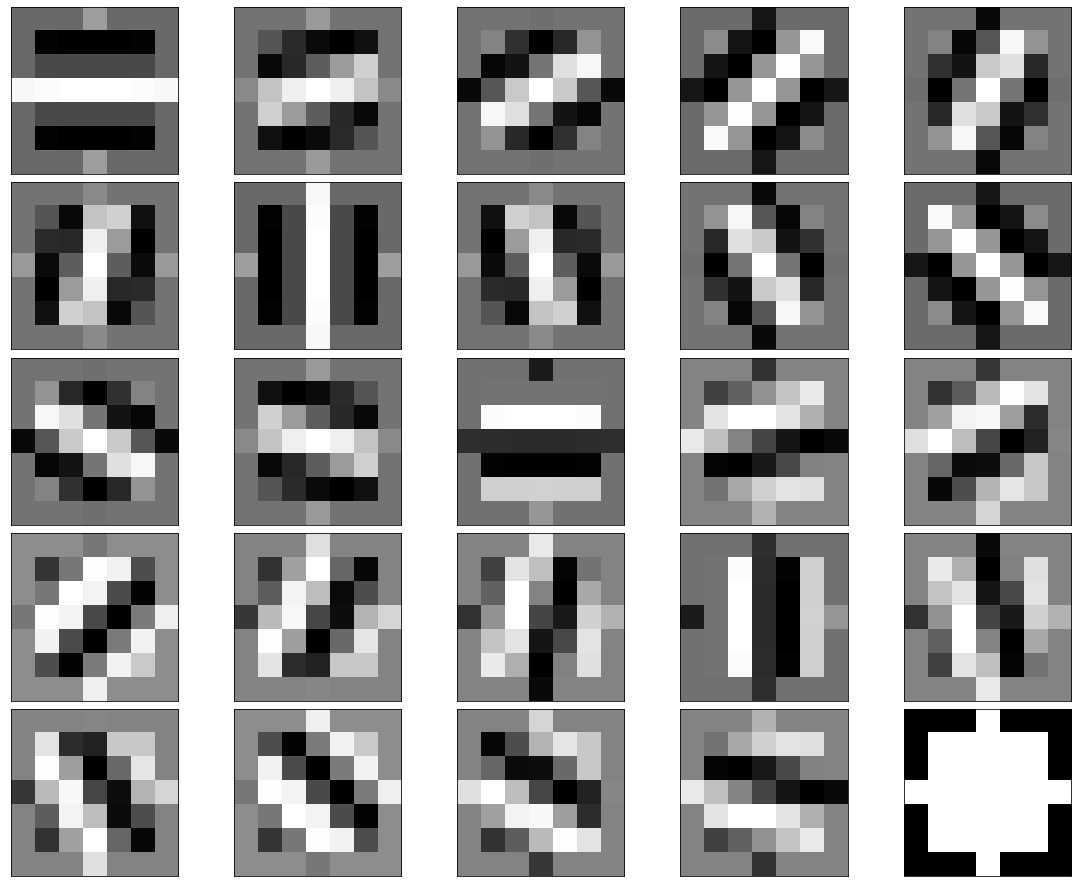

In [3]:
fig, axes = plt.subplots(5, 5, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots\n",
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots\n",
k = 0
for i in range(5):
    for j in range(5):  # Loop over the number of samples we want to plot\n",
        axes[i,j].imshow(data[:,:,0,k],cmap = 'gray')  # Plots the sample Image in graysclae\n",
        axes[i,j].get_xaxis().set_visible(False)  # Removes the x-axis from the plot\n",
        axes[i,j].get_yaxis().set_visible(False)  # Removes the y-axis from the plot\n",
        k+=1
fig.savefig('training_examples.png', bbox_inches='tight')  # Saves the figure

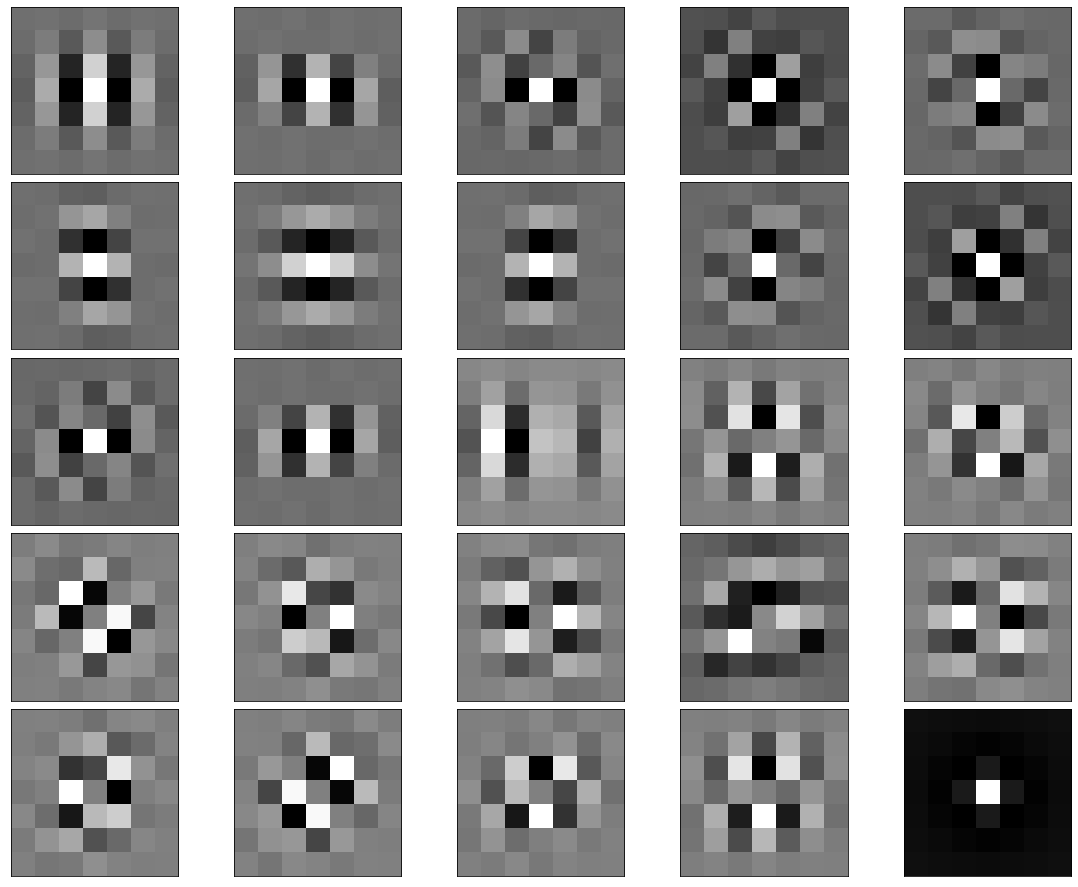

In [38]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
delta_theta = np.pi/12.0
sigma = 1.5
lamda = 2
ksize=7  #Try 15 for hidden image. Or 9 for others
gamma = lamda/sigma          
for phi in [0.0, 1.5707963267948966]: #0.8 for hidden image. Otherwise leave it to 0
    for i in range(12):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = i * delta_theta
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
        kernels.append(kernel)

kernels.append(np.zeros((7,7)))
#Un-Normalized Gabor Kernel 
kernels = np.array(kernels)

for kernel in kernels:
    sum_positive = 0
    sum_negative = 0
    for i, row in enumerate(kernel):
        for j, col_el in enumerate(row):
            if col_el>= 0 :
                sum_positive += col_el
            else:
                sum_negative -= col_el
    for i, row in enumerate(kernel):
        for j, col_el in enumerate(row):
            # if col_el>= 0 and sum_positive > 0:
            if col_el>= 0: 
                kernel[i,j] = col_el/sum_positive
            else:
                # if sum_negative>0:
                kernel[i,j] = col_el/sum_negative
kernels[24,:,:] = DoG

# fig, axes = plt.subplots(kernels.shape[0]//5, 5, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
fig, axes = plt.subplots(5, 5, frameon=False, figsize=(20,16))
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots\n",
k = 0
for i in range(5):
    for j in range(5):  # Loop over the number of samples we want to plot\n",
        axes[i,j].imshow(kernels[k,:,:], cmap ='gray')  # Plots the sample Image in graysclae\n",
        axes[i,j].get_xaxis().set_visible(False)  # Removes the x-axis from the plot\n",
        axes[i,j].get_yaxis().set_visible(False)  # Removes the y-axis from the plot\n",
        k+=1

In [28]:
test = np.array([[1.0,-4.0], [2.0,-1.0]])
sum_positive = 0
sum_negative = 0
for i, row in enumerate(test):
    for j, col_el in enumerate(row):
        if col_el>= 0 :
            sum_positive += col_el
        else:
            sum_negative -= col_el
print(test)
print(np.sum(test))
for i, row in enumerate(test):
    for j, col_el in enumerate(row):
        if col_el>= 0 :
            test[i,j] = col_el/sum_positive
        else:
            test[i,j] = col_el/sum_negative

print(test)
print(np.sum(test))

[[ 1. -4.]
 [ 2. -1.]]
-2.0
[[ 0.33333333 -0.8       ]
 [ 0.66666667 -0.2       ]]
-1.1102230246251565e-16


In [12]:
test = None
def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure()
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)
def genGabor(ksize, sigma, theta, lamda, gamma, phi):
    print(f"Theta : {np.rad2deg(theta)}")
    print(f"phase : {np.rad2deg(phi)}")
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    sum_positive = 0
    sum_negative = 0
    for i, row in enumerate(kernel):
        for j, col_el in enumerate(row):
            if col_el>= 0 :
                sum_positive += col_el
            else:
                sum_negative -= col_el
    for i, row in enumerate(kernel):
        for j, col_el in enumerate(row):
            # if col_el>= 0 and sum_positive > 0:
            if col_el>= 0: 
                kernel[i,j] = col_el/sum_positive
            else:
                # if sum_negative>0:
                kernel[i,j] = col_el/sum_negative
    print(f"kernel_avg : {np.sum(kernel)}")
    return kernel

In [14]:
from IPython.html.widgets import interact, interactive, fixed
def demoGabor(ksize, sigma, theta, lamda, phi):
    gamma = lamda/sigma
    kernel = genGabor(ksize, sigma, theta, lamda, gamma, phi)
    myimshow(kernel)
interact(demoGabor, ksize = (1,256,1), sigma = (0,10,0.5), theta = (0,np.pi,np.pi/12), lamda = (0,10,0.05), phi = (-np.pi, np.pi+1,np.pi/180))

interactive(children=(IntSlider(value=128, description='ksize', max=256, min=1), FloatSlider(value=5.0, descri…

<function __main__.demoGabor(ksize, sigma, theta, lamda, phi)>

1.0000000000000002
0.9999999999999999
2.96637714392034e-16


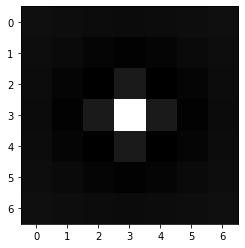

In [35]:
def gaussian_kernel(dimension_x, dimension_y, sigma_x, sigma_y):
    x = cv2.getGaussianKernel(dimension_x, sigma_x)
    y = cv2.getGaussianKernel(dimension_y, sigma_y)
    kernel = x.dot(y.T)
    return kernel
g_kernel_small = gaussian_kernel(7, 7, 0.5, 0.5)
g_kernel_big = gaussian_kernel(7, 7, 1.5, 1.5)
print(np.sum(g_kernel_small))
# g_kernel_big = g_kernel_big/np.sum(g_kernel_big)
print(np.sum(g_kernel_big))
DoG =g_kernel_small-g_kernel_big
print(np.sum(DoG))
plt.imshow(DoG)
# print(DoG)
# print(g_kernel_small)

In [9]:
np.sqrt(1.6896552)

1.2998673778505252

In [10]:
np.deg2rad(90)

1.5707963267948966

In [39]:
print(np.sum(DoG))

2.96637714392034e-16


In [10]:
import torch
import torch.nn as nn
import numpy as np
nn.Parameter(torch.FloatTensor(5,1,1).uniform_(0, 2))

Parameter containing:
tensor([[[0.2862]],

        [[0.1012]],

        [[0.3718]],

        [[1.0236]],

        [[1.5209]]], requires_grad=True)